## Wine quality prediction

### Predicting wine quality is a common machine learning project that involves building a model to estimate the quality of a wine based on various features and characteristics. Here's a project description for a wine quality prediction project:

### Project Overview:
#### In this project, we aim to build a machine learning model that can predict the quality of wines based on their chemical attributes and characteristics. Wine quality assessment is essential for vineyards and wine producers to ensure the consistency and high quality of their products. By developing a predictive model, we can automate this assessment and potentially discover which factors have the most significant impact on wine quality.

### Dataset:
#### For this project, we will use a dataset that includes a range of features related to red and white wines, such as acidity, sugar content, pH levels, alcohol percentage, and more. 

### Importing necessary header files

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.simplefilter("ignore")

### Reading the dataset

In [5]:
data=pd.read_csv("C:/Users/ayush/OneDrive/Desktop/Data sc/datasets/WineQuality.csv")

### Data processing

In [6]:
data.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine
1,2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine
2,1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine
3,3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,White Wine
4,4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,White Wine


In [7]:
data.shape

(32485, 14)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32485 entries, 0 to 32484
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            32485 non-null  int64  
 1   fixed acidity         32485 non-null  float64
 2   volatile acidity      32485 non-null  float64
 3   citric acid           32485 non-null  float64
 4   residual sugar        32485 non-null  float64
 5   chlorides             32485 non-null  float64
 6   free sulfur dioxide   32485 non-null  float64
 7   total sulfur dioxide  32485 non-null  float64
 8   density               32485 non-null  float64
 9   pH                    32485 non-null  float64
 10  sulphates             32485 non-null  float64
 11  alcohol               32485 non-null  float64
 12  quality               32485 non-null  int64  
 13  Type                  32485 non-null  object 
dtypes: float64(11), int64(2), object(1)
memory usage: 3.5+ MB


In [10]:
data.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000
mean,3251.548376,7.214736,0.340122,0.318324,5.438696,0.056009,30.458258,115.656303,0.994719,3.219089,0.531500,10.480694,5.811698
std,1873.780954,1.308216,0.164912,0.145152,4.799221,0.034503,17.608076,56.456074,0.003015,0.161441,0.148712,1.190661,0.872474
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1627.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992400,3.110000,0.430000,9.500000,5.000000
50%,3249.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000,6.000000
75%,4875.000000,7.700000,0.410000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,6496.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#### The dataset has no null or missing values

In [12]:
data["Type"].value_counts()

White Wine    24453
Red Wine       8032
Name: Type, dtype: int64

In [13]:
data["quality"].value_counts()

6    14117
5    10755
7     5371
4     1144
8      941
3      133
9       24
Name: quality, dtype: int64

### Data visualisation

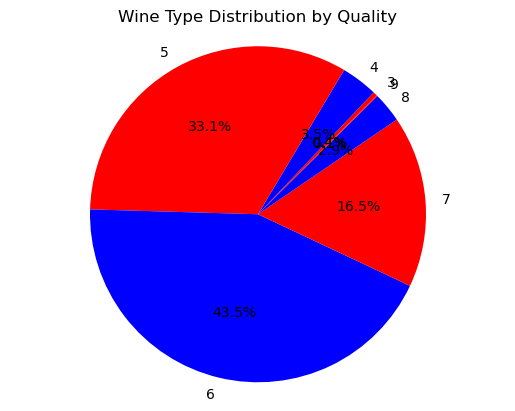

In [29]:
# Group the data by quality and type, and count the occurrences
grouped_data = data.groupby(["quality", "Type"]).size().unstack(fill_value=0)

# Create a single pie chart
colors = ["red", "blue"]  # Colors for red and white wine
quality_labels = grouped_data.index
sizes = grouped_data.sum(axis=1)

# Generate the 'explode' parameter with one value for each segment
explode = [0.1 if quality == "Good" else 0 for quality in quality_labels]

plt.pie(sizes, labels=quality_labels, autopct="%1.1f%%", colors=colors, startangle=45, explode=explode)
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Wine Type Distribution by Quality")
plt.show()

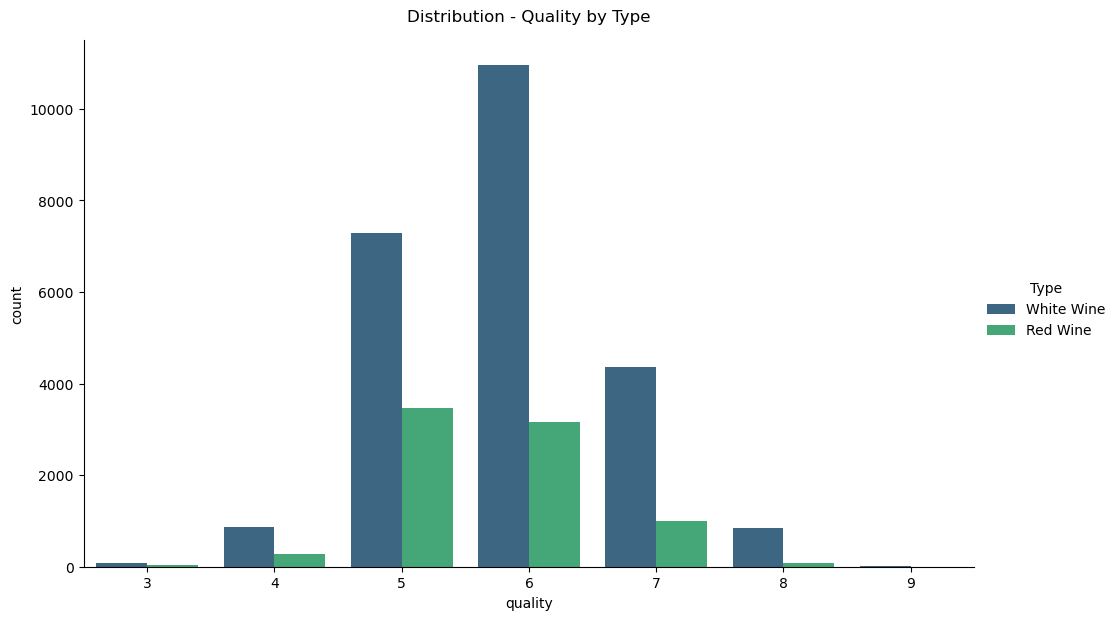

In [33]:
# Create the countplot using catplot
sns.catplot(x='quality', hue='Type', data=data, kind='count', palette='viridis', height=6, aspect=1.67)

# Set the title
plt.title('Distribution - Quality by Type', y=1.02)

# Show the plot
plt.show()

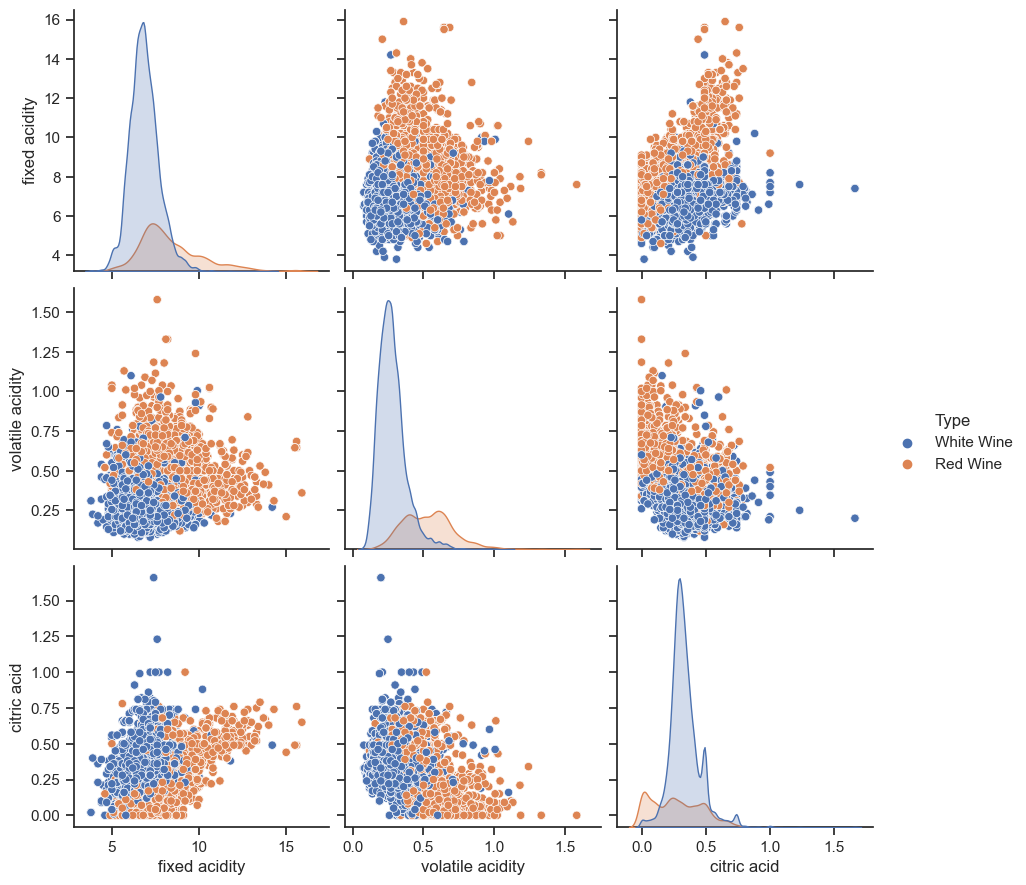

In [38]:
# Create a pairplot with hue='Type' for coloring
sns.set(style="ticks")
sns.pairplot(data[['fixed acidity', 'volatile acidity', 'citric acid', 'Type']], hue='Type', height=3, markers="o")

# Show the plot
plt.show()

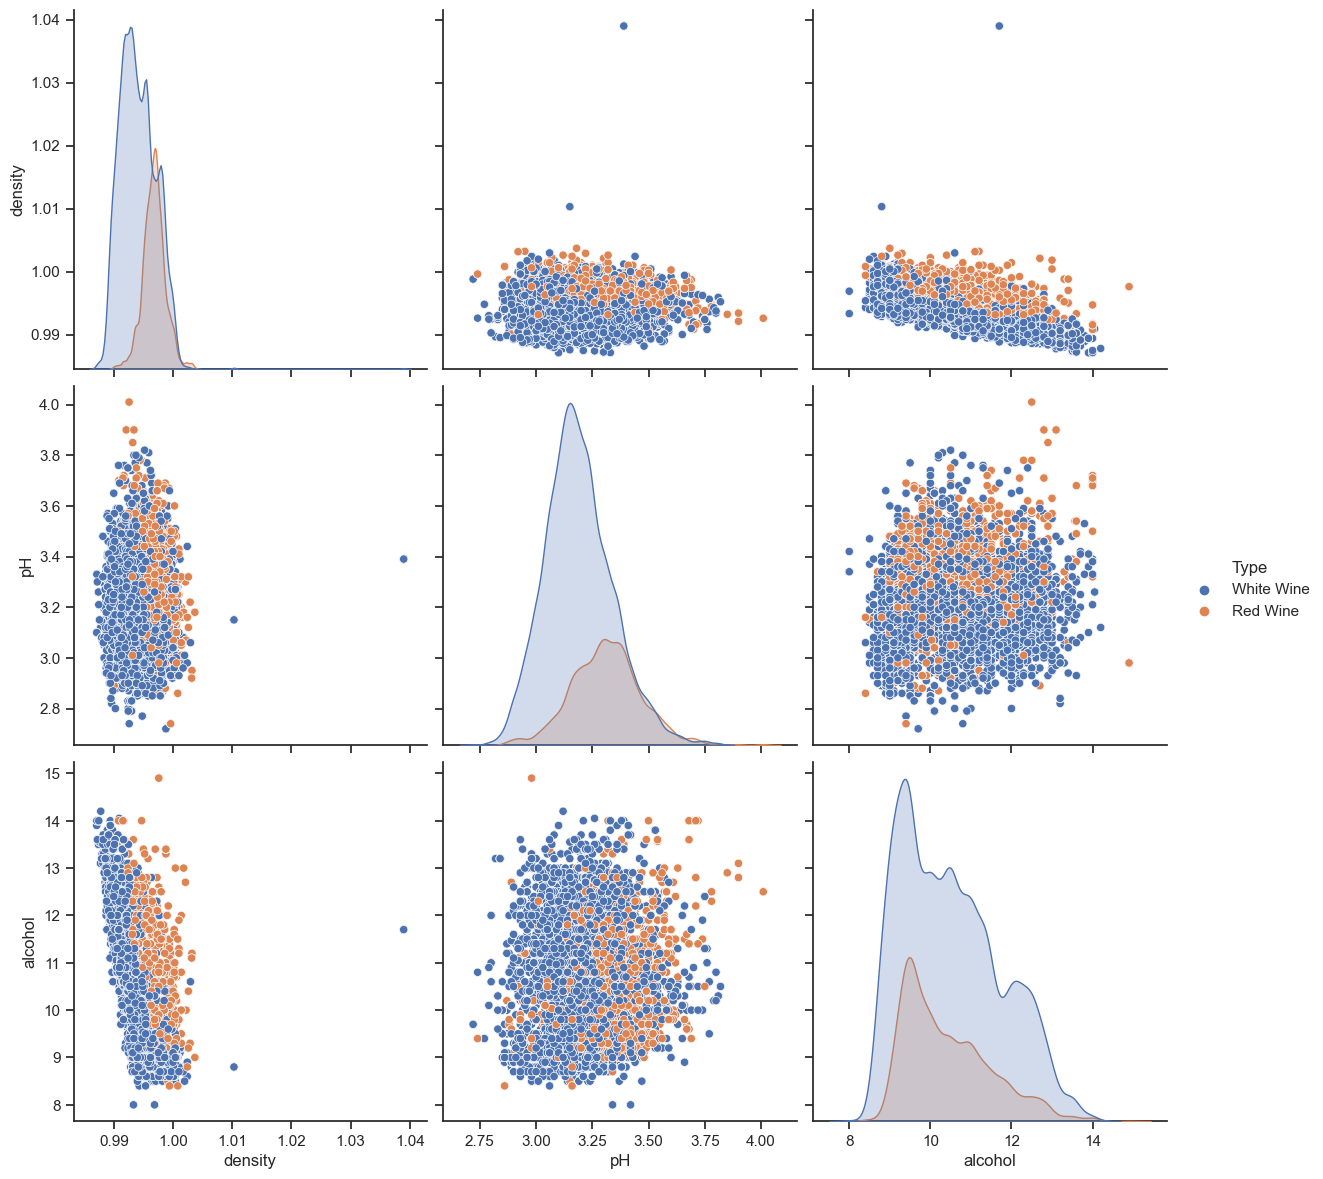

In [44]:
# Create a pairplot with hue='Type' for coloring
sns.set(style="ticks")
sns.pairplot(data[['density','pH','alcohol', 'Type']], hue='Type', height=4, markers="o")

# Show the plot
plt.show()

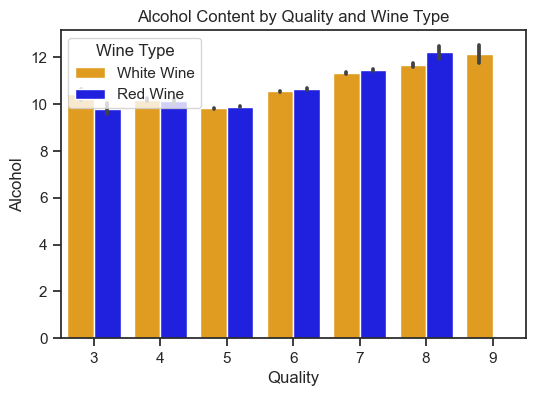

In [56]:
# Set the figure size
plt.figure(figsize=(6, 4))

# Create a bar plot with different colors for wine types
colors = {'Red Wine': 'blue', 'White Wine': 'orange'}  # Define colors for wine types
sns.barplot(x='quality', y='alcohol', hue='Type', data=data, palette=colors)

# Set labels and title
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Alcohol Content by Quality and Wine Type')

# Show the legend with wine type colors
plt.legend(title='Wine Type', loc='upper left')

# Show the plot
plt.show()

### Trainig the model using Linear Regression

In [65]:
# Encode categorical variable "Type" using one-hot encoding
data = pd.get_dummies(data, columns=["Type"], prefix=["Type"])

# Define X and y
X = data.drop(columns=["quality"])  # Features (independent variables)
y = data["quality"]               # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


In [66]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error: 0.53
R-squared (R2) Score: 0.30


### The MSE value obtained is not that good but it can be improved by othe Machine learning algorithms.

### Using cross validation

In [67]:
from sklearn.model_selection import cross_val_score
# Example using Mean Squared Error as the scoring metric
mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
positive_mse_scores = -mse_scores

# Calculate the mean and standard deviation of MSE scores
mean_mse = positive_mse_scores.mean()
std_mse = positive_mse_scores.std()

print(f"Mean MSE: {mean_mse:.2f}")
print(f"Standard Deviation of MSE: {std_mse:.2f}")


Mean MSE: 0.54
Standard Deviation of MSE: 0.01


### A standard deviation of 0.1 is relatively low, which means that the data points in the dataset or the scores (in the context of cross-validation) are clustered closely around the mean value. In other words, the values are relatively consistent and similar to each other.